### Set up

In [4]:
# importing all necessary packages and libraries

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Preparing the dataframe

In [5]:
# Read both tables
sales = pd.read_csv("data/king_county_house_sales.csv")
details = pd.read_csv("data/king_county_house_details.csv")

# Merge them to one dataframe (equivalent to SQL JOIN)
combined = pd.merge(
    sales, 
    details, 
    left_on='house_id',  # Column in sales table
    right_on='id',        # Column in details table
    how='outer'           # FULL JOIN
)

# attention: the dataframe might have duplicate columns which we will remove during the data cleaning phase
combined.isna().sum()
combined.describe()
combined.head()


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000.000,1000102,2495,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,2015-04-22,300000.000,1000102,2496,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
2,2014-05-08,647500.000,1200019,6730,1200019,4.000,1.750,2060.000,26036.000,1.000,...,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000
3,2014-08-11,400000.000,1200021,8405,1200021,3.000,1.000,1460.000,43000.000,1.000,...,7,1460.000,0.000,1952,0.000,98166,47.443,-122.347,2250.000,20023.000
4,2015-04-01,235000.000,2800031,8801,2800031,3.000,1.000,1430.000,7599.000,1.500,...,6,1010.000,420.000,1930,0.000,98168,47.478,-122.265,1290.000,10320.000


### Cleaning the data

our client is Jennifer Montgomery
she is a Buyer	
she has a high budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year

Cleaning phase 1:
1. Unify the column names (removing spaces, all lowercase, see if there are missing column names)
2. Rename columns
3. Remove duplicate columns and rows
4. Adjust data types due to columns needs
5. Adjust nr. of decimal according to column reason


In [6]:
# replacing empty spaces with underscores in column names
combined.columns = combined.columns.str.replace(' ','_')
combined.columns

Index(['date', 'price', 'house_id', 'id_x', 'id_y', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# changing all column names to lower case
combined.columns = combined.columns.str.lower()
combined.columns

Index(['date', 'price', 'house_id', 'id_x', 'id_y', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# renaming unclear column names
combined = combined.rename({'date':'date_sold'},axis=1)
combined = combined.rename({'id_x':'sale_id'},axis=1)
combined = combined.rename({'bedrooms':'no_bedrooms'},axis=1)
combined = combined.rename({'bathrooms':'no_bathrooms'},axis=1)
combined = combined.rename({'floors':'no_floors'},axis=1)
combined = combined.rename({'view':'view_quality'},axis=1)

combined.columns

Index(['date_sold', 'price', 'house_id', 'sale_id', 'id_y', 'no_bedrooms',
       'no_bathrooms', 'sqft_living', 'sqft_lot', 'no_floors', 'waterfront',
       'view_quality', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [9]:
# remove duplicate columns: id_y

combined_dropped = combined.drop("id_y", axis=1)
combined_dropped

# check how many duplicated rows exist in the data frame
combined_dropped.duplicated().value_counts()

# no duplicate rows, no need to remove duplicate rows


False    21597
Name: count, dtype: int64

In [10]:
combined_dropped.head(3)

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000.000,1000102,2495,6.000,3.000,2400.000,9373.000,2.000,NaN,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,2015-04-22,300000.000,1000102,2496,6.000,3.000,2400.000,9373.000,2.000,NaN,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
2,2014-05-08,647500.000,1200019,6730,4.000,1.750,2060.000,26036.000,1.000,NaN,...,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000


In [11]:
# look the current data types of the columns
combined_dropped.dtypes

date_sold         object
price            float64
house_id           int64
sale_id            int64
no_bedrooms      float64
no_bathrooms     float64
sqft_living      float64
sqft_lot         float64
no_floors        float64
waterfront       float64
view_quality     float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Data types to be changed

| Column         | Original dtype | Converted dtype |
|----------------|----------------|-----------------|
| date_sold      | object         | datetime64[ns]  |
| price          | float64        | int64           |
| house_id       | int64          | *               |
| sale_id        | int64          | *               |
| no_bedrooms    | float64        | int64           |
| no_bathrooms   | float64        | int64           |
| sqft_living    | float64        | *               |
| sqft_lot       | float64        | *               |
| no_floors      | float64        | int64           |
| waterfront     | float64        | boolean         |
| view_quality   | float64        | int64           |
| condition      | int64          | *               |
| grade          | int64          | *               |
| sqft_above     | float64        | *               |
| sqft_basement  | float64        | *               |
| yr_built       | int64          | *               |
| yr_renovated   | float64        | int64           |
| zipcode        | int64          | *               |
| lat            | float64        | *               |
| long           | float64        | *               |
| sqft_living15  | float64        | int64           |
| sqft_lot15     | float64        | int64           |



4. Adjust data types due to columns needs

"view_quality": int
"yr_renovated": int


In [12]:
#Columns woith missing data:

#"view_quality": int
#"yr_renovated": int

combined_dropped.isna().sum()

date_sold           0
price               0
house_id            0
sale_id             0
no_bedrooms         0
no_bathrooms        0
sqft_living         0
sqft_lot            0
no_floors           0
waterfront       2391
view_quality       63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
combined_dropped = combined_dropped.astype({"price": int, "no_bedrooms": int, "no_bathrooms": int, "no_floors": int, "sqft_living15": int, "sqft_lot15": int})



combined_dropped = combined_dropped.astype({"sqft_living": int, "sqft_lot": int, "sqft_above": int})

#check if all data types are now correct
combined_dropped.dtypes

date_sold         object
price              int64
house_id           int64
sale_id            int64
no_bedrooms        int64
no_bathrooms       int64
sqft_living        int64
sqft_lot           int64
no_floors          int64
waterfront       float64
view_quality     float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# we have discovered there 2391 rows without data in the waterfront column
#combined_dropped.waterfront.isna()
combined_dropped.head()

# due to the strong majority of observations with 0 waterfronts, 
# we have decided to convert the rows without value to 0 and later convert 0 and 1 into a boolean

combined_dropped.waterfront = combined_dropped.waterfront.fillna(0)

combined_dropped = combined_dropped.astype({"waterfront": bool})
combined_dropped.waterfront.value_counts()

combined_dropped.isna().sum()


date_sold           0
price               0
house_id            0
sale_id             0
no_bedrooms         0
no_bathrooms        0
sqft_living         0
sqft_lot            0
no_floors           0
waterfront          0
view_quality       63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
combined_dropped.head()

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000,1000102,2495,6,3,2400,9373,2,False,...,7,2400,0.000,1991,0.000,98002,47.326,-122.214,2060,7316
1,2015-04-22,300000,1000102,2496,6,3,2400,9373,2,False,...,7,2400,0.000,1991,0.000,98002,47.326,-122.214,2060,7316
2,2014-05-08,647500,1200019,6730,4,1,2060,26036,1,False,...,8,1160,900.000,1947,0.000,98166,47.444,-122.351,2590,21891
3,2014-08-11,400000,1200021,8405,3,1,1460,43000,1,False,...,7,1460,0.000,1952,0.000,98166,47.443,-122.347,2250,20023
4,2015-04-01,235000,2800031,8801,3,1,1430,7599,1,False,...,6,1010,420.000,1930,0.000,98168,47.478,-122.265,1290,10320


In [16]:
# type of first date entry
type(combined_dropped['date_sold'][0])
combined_dropped['date_sold'][0]

'2014-09-16'

In [17]:
# change "date" dtype to datetime with format %Y/%m/%d
combined_dropped['date_sold'] = pd.to_datetime(combined_dropped['date_sold'])

In [18]:
type(combined_dropped['date_sold'][0])
combined_dropped['date_sold'][0].month

9

In [19]:
combined.query("waterfront == 1")

,date_sold,price,house_id,sale_id,id_y,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
208,2014-06-24,549000.000,121029034,4908,121029034,2.000,1.000,2034.000,13392.000,1.000,...,7,1159.000,875.000,1947,0.000,98070,47.331,-122.503,1156.000,15961.000
211,2015-02-06,629000.000,121039083,9846,121039083,3.000,1.750,1460.000,12367.000,2.000,...,8,1120.000,340.000,1970,0.000,98023,47.331,-122.375,1970.000,18893.000
404,2015-04-28,400000.000,221029019,8271,221029019,3.000,2.500,2090.000,32718.000,2.000,...,7,1550.000,540.000,1919,NaN,98070,47.334,-122.511,1200.000,192268.000
406,2014-09-17,340000.000,222029026,6097,222029026,2.000,0.750,1060.000,48292.000,1.000,...,6,560.000,500.000,1947,0.000,98070,47.428,-122.511,750.000,80201.000
622,2015-04-20,1410000.000,284000025,19585,284000025,2.000,2.000,2180.000,18525.000,1.000,...,9,1580.000,NaN,1952,0.000,98146,47.504,-122.387,2480.000,21503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20256,2015-01-28,1600000.000,9253900417,5662,9253900417,3.000,2.500,2850.000,19593.000,1.500,...,10,1790.000,1060.000,1978,0.000,98008,47.589,-122.111,2850.000,18782.000
20670,2014-06-23,3400000.000,9362000040,7983,9362000040,3.000,4.500,5230.000,17826.000,2.000,...,10,3740.000,1490.000,2005,0.000,98040,47.535,-122.243,3670.000,17826.000
20802,2014-07-10,1610000.000,9412400220,14761,9412400220,4.000,2.750,5470.000,18200.000,2.000,...,11,3730.000,1740.000,1992,0.000,98118,47.532,-122.263,3620.000,15100.000
21194,2014-12-23,520000.000,9536600010,15317,9536600010,4.000,0.750,1960.000,8277.000,1.000,...,7,1320.000,640.000,1923,19860.000,98198,47.365,-122.325,1940.000,8402.000


### Checking distributions of the continuous variables

#### Cleaning and plotting the price variable

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

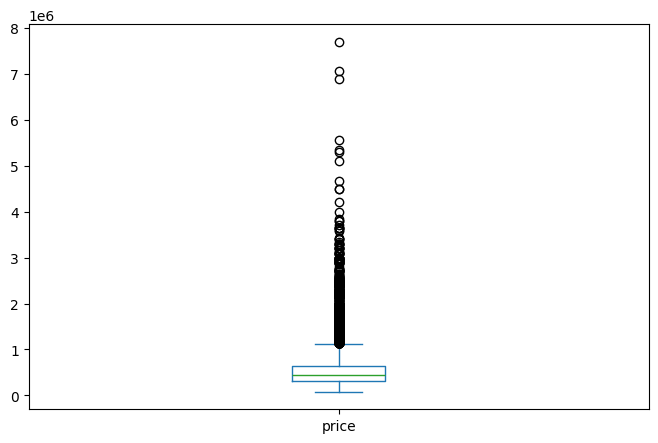

In [20]:
#plotting the price column

combined_dropped.price.plot(kind="box")

combined_dropped.price.describe()


storing price after killing outliers in the combined_clean dataframe

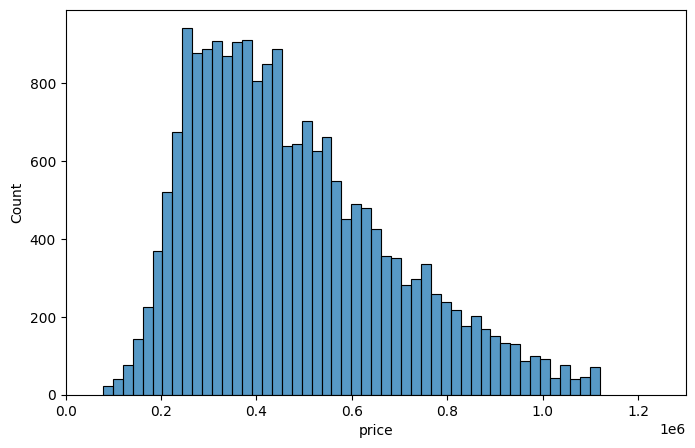

In [21]:

# Any house price above 1.13 million is considered an outlier.

Q1 = combined_dropped['price'].quantile(0.25)
Q3 = combined_dropped['price'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

combined_clean = combined_dropped[(combined_dropped['price'] >= lower) & (combined_dropped['price'] <= upper)]

sns.histplot(data=combined_clean, x="price",
             )
plt.xlim(0, 1300000)
plt.show()

In [22]:
combined_clean.price.describe()

count     20439.000
mean     476702.632
std      207790.276
min       78000.000
25%      315000.000
50%      437500.000
75%      600000.000
max     1120000.000
Name: price, dtype: float64

#### Date_sold histograms

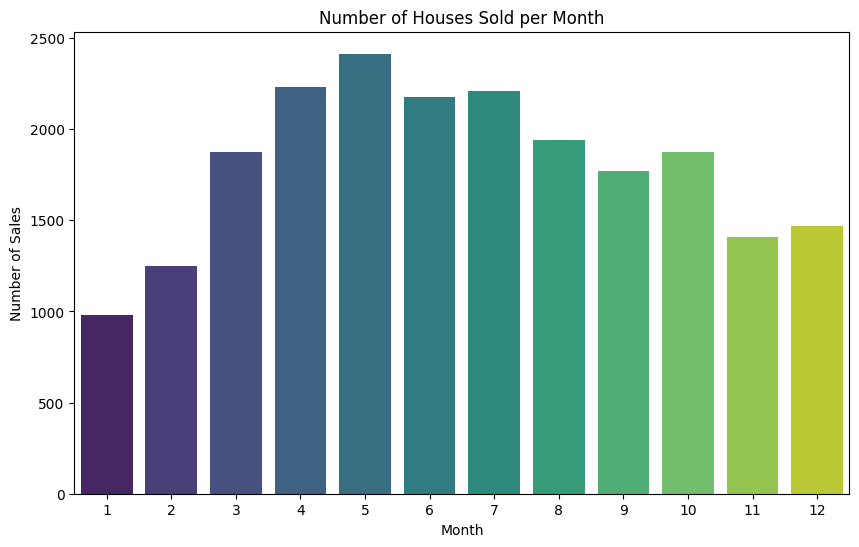

In [23]:
combined_dropped.date_sold.describe()

#sns.histplot(data=combined_dropped, x="date_sold", bins=52)
#plt.xlim(0, )
#plt.show()


combined_dropped['month'] = combined_dropped['date_sold'].dt.month
combined_dropped['weekday'] = combined_dropped['date_sold'].dt.day_name()
#combined_dropped['year'] = combined_dropped['date_sold'].dt.year


plt.figure(figsize=(10,6))
sns.countplot(data=combined_dropped, x='month', palette='viridis')

plt.title("Number of Houses Sold per Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

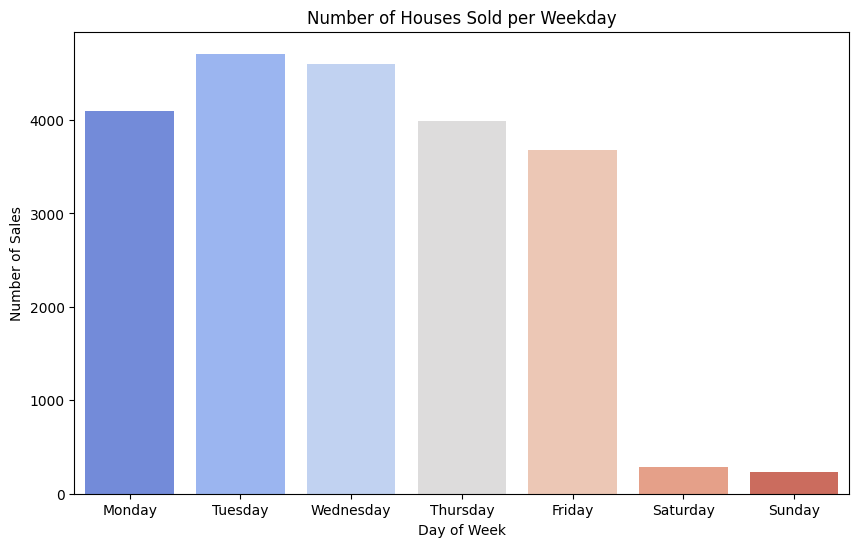

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=combined_dropped, 
              x='weekday', 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette='coolwarm')

plt.title("Number of Houses Sold per Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Sales")
plt.show()

#### Nr. of Bathrooms histogram

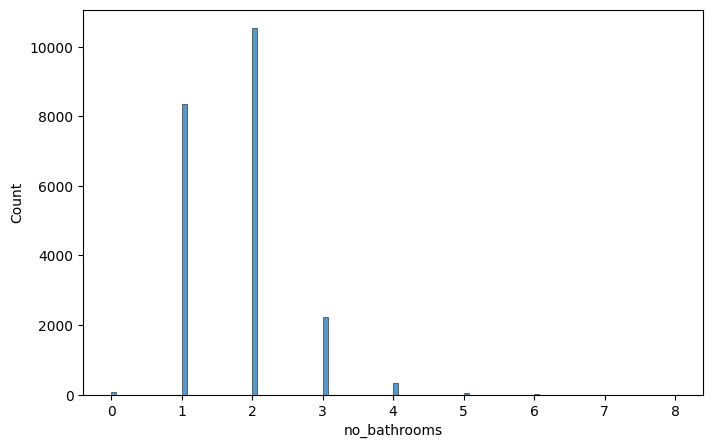

In [25]:
combined_dropped.no_bathrooms.mode()


sns.histplot(data=combined_dropped, x="no_bathrooms",
             )
#plt.xlim(0, 1300000)
plt.show()

#### Cleaning and plotting the Nr. of Bedrooms variable

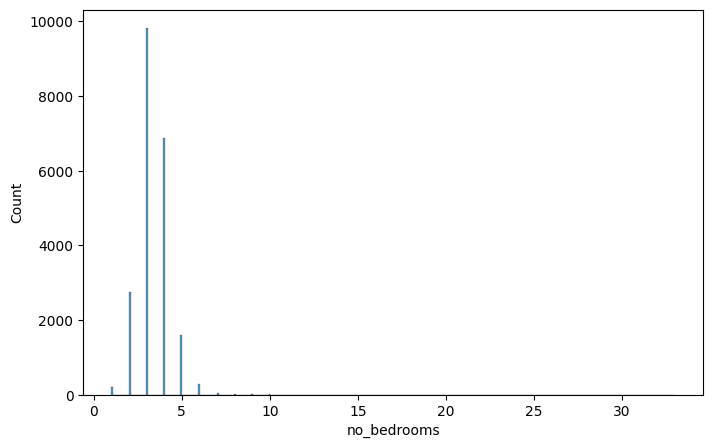

count   21597.000
mean        3.373
std         0.926
min         1.000
25%         3.000
50%         3.000
75%         4.000
max        33.000
Name: no_bedrooms, dtype: float64

In [26]:
# Original Nr. of Bedrooms histogram

sns.histplot(data=combined_dropped, x="no_bedrooms",
             )
plt.show()

combined_dropped.no_bedrooms.describe()


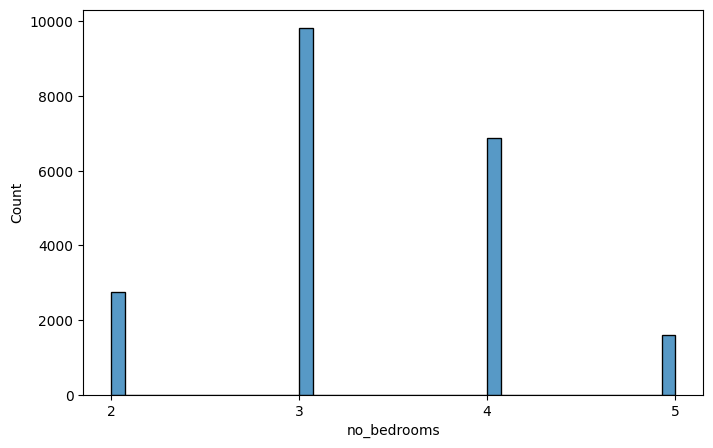

In [27]:
# Plotting after cleaning outliers

Q1 = combined_dropped['no_bedrooms'].quantile(0.25)
Q3 = combined_dropped['no_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

combined_clean = combined_dropped[(combined_dropped['no_bedrooms'] >= lower) & (combined_dropped['no_bedrooms'] <= upper)]

sns.histplot(data=combined_clean, x="no_bedrooms")
plt.xticks(range(2, 6))   # 0 through 10 bedrooms

#plt.xlim(0, 1300000)
plt.show()

#### sqft_basement variable - cleaning NaNs, killing outliers, plotting histogram

In [28]:
# cleaning the NaN in the sqft_basement column
combined_dropped.sqft_basement = combined_dropped.sqft_living - combined_dropped.sqft_above

combined_dropped.isna().sum()

date_sold           0
price               0
house_id            0
sale_id             0
no_bedrooms         0
no_bathrooms        0
sqft_living         0
sqft_lot            0
no_floors           0
waterfront          0
view_quality       63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
weekday             0
dtype: int64

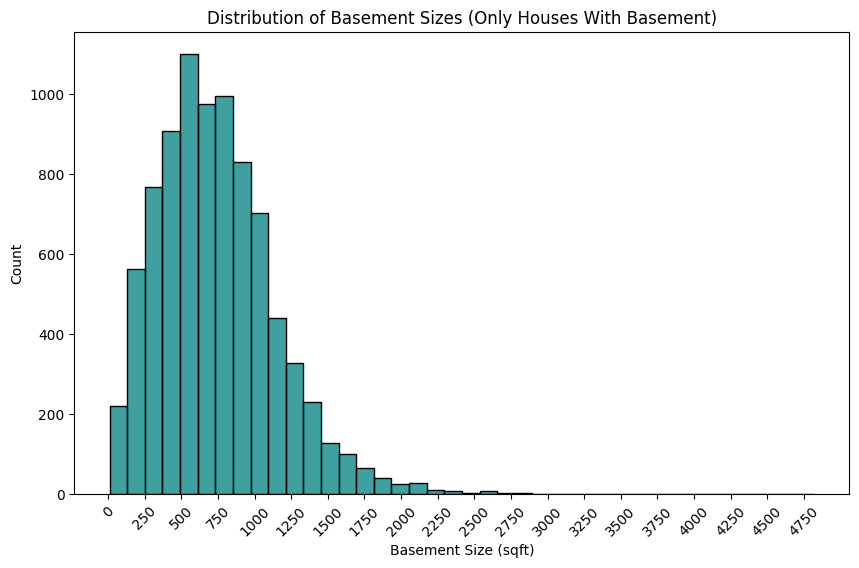

In [29]:
combined_dropped_basement = combined_dropped[combined_dropped['sqft_basement'] > 0]

plt.figure(figsize=(10,6))
sns.histplot(data=combined_dropped_basement, x='sqft_basement', bins=40, color='teal')
max_value = combined_dropped_basement['sqft_basement'].max()

plt.xticks(np.arange(0, max_value + 1, 250))
plt.title("Distribution of Basement Sizes (Only Houses With Basement)")
plt.xlabel("Basement Size (sqft)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

Removing outliers and plotting again

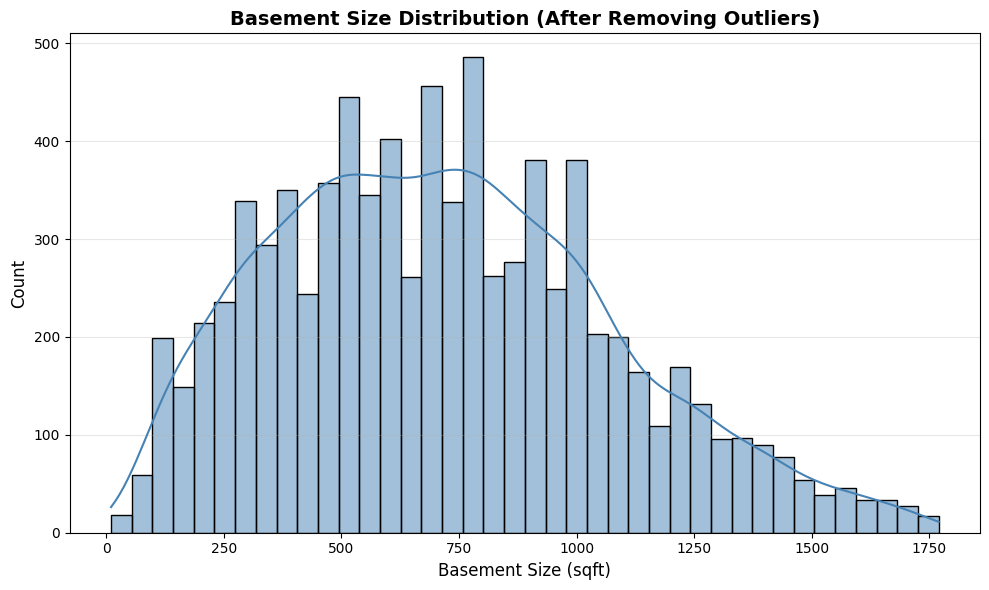

In [30]:


# Calculate IQR and bounds
Q1 = combined_dropped_basement['sqft_basement'].quantile(0.25)
Q3 = combined_dropped_basement['sqft_basement'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers
combined_basement_no_outliers = combined_dropped_basement[
    (combined_dropped_basement['sqft_basement'] >= lower_bound) & 
    (combined_dropped_basement['sqft_basement'] <= upper_bound)
]


# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_basement_no_outliers, x='sqft_basement', 
             bins=40, kde=True, color='steelblue')

plt.title('Basement Size Distribution (After Removing Outliers)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Basement Size (sqft)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### sqft_living (without removing outliers thoroughly)

In [31]:
combined_dropped.sqft_living.describe()

count   21597.000
mean     2080.322
std       918.106
min       370.000
25%      1430.000
50%      1910.000
75%      2550.000
max     13540.000
Name: sqft_living, dtype: float64

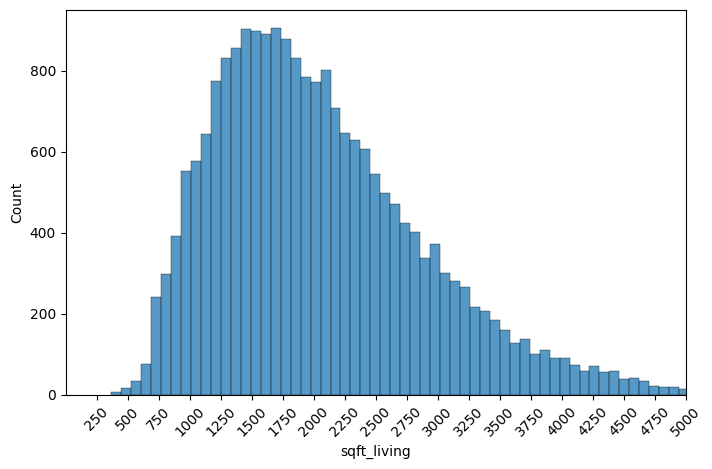

In [32]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="sqft_living") #, bins=30)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
plt.xlim(1, 5000)
plt.show()

#### sqft_above (without removing outliers)

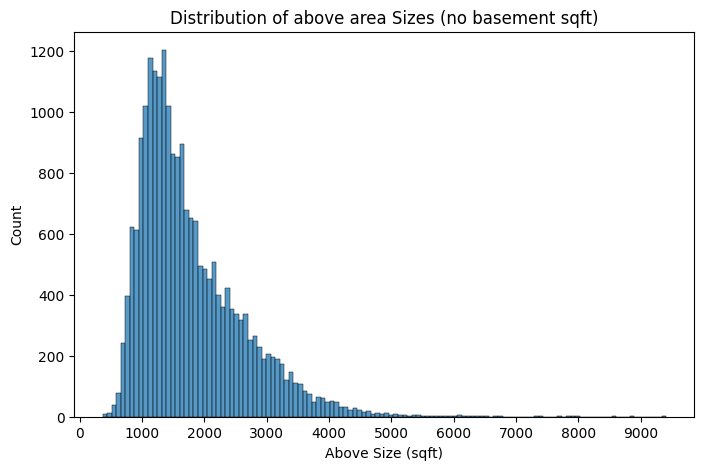

In [33]:
combined_dropped.sqft_above.describe()

ax = sns.histplot(data=combined_dropped, x="sqft_above") #, bins=30)
#plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title("Distribution of above area Sizes (no basement sqft)")
plt.xlabel("Above Size (sqft)")
#plt.xlim(1, 5000)
plt.show()

#### sqft_lot: removing outliers and plotting

In [34]:
combined_dropped.sqft_lot.describe()


count     21597.000
mean      15099.409
std       41412.637
min         520.000
25%        5040.000
50%        7618.000
75%       10685.000
max     1651359.000
Name: sqft_lot, dtype: float64

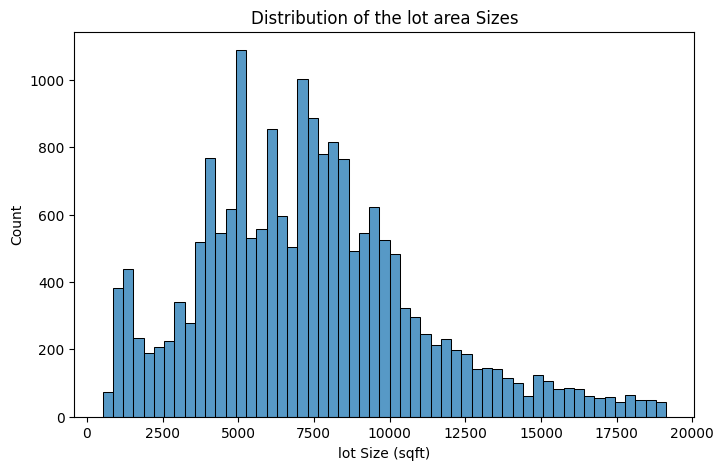

In [35]:

Q1 = combined_dropped['sqft_lot'].quantile(0.25)
Q3 = combined_dropped['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

combined_clean = combined_dropped[(combined_dropped['sqft_lot'] >= lower) & (combined_dropped['sqft_lot'] <= upper)]

ax = sns.histplot(data=combined_clean, x="sqft_lot") #, bins=30)
#plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title("Distribution of the lot area Sizes")
plt.xlabel("lot Size (sqft)")
#plt.xlim(1, 5000)
plt.show()

#### View_quality - imputing NaNs, adjusting data type and plotting histogram

In [36]:
combined_dropped.query("waterfront == True and view_quality.isna() == True")

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,weekday
16736,2015-04-13,5300000,7558700030,1314,6,6,7390,24829,2,True,...,2390,1991,0.000,98040,47.563,-122.210,4320,24619,4,Monday


In [37]:
## replacing the one entry with waterfront and no quylity view to 4

combined_dropped.loc[16736, "view_quality"] = int(4)

combined_dropped.loc[16736, "view_quality"]



np.float64(4.0)

In [38]:
# fill NaN values in view_quality with 0  

combined_dropped["view_quality"] = combined_dropped["view_quality"].fillna(0)

In [39]:
combined_dropped = combined_dropped.astype({"view_quality": int})

combined_dropped.sqft_lot15.info()


<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_lot15
Non-Null Count  Dtype
--------------  -----
21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


In [40]:
#what is the mode of view_quality when theres a waterfront
combined_dropped.query("waterfront == True").view_quality.mode()

0    4
Name: view_quality, dtype: int64

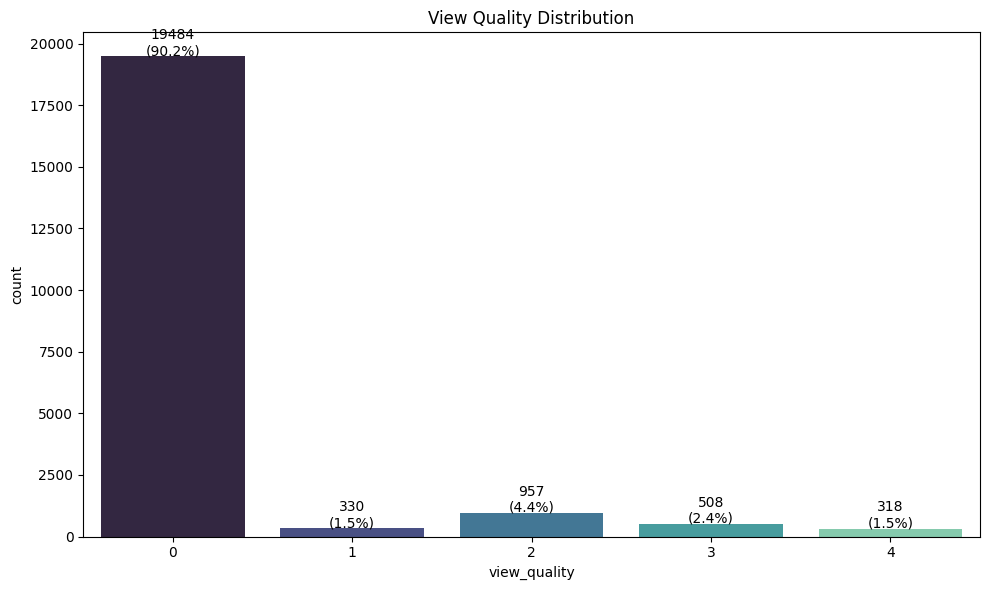

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_dropped, x='view_quality', 
                   palette='mako', order=[0, 1, 2, 3, 4])
total = len(combined_dropped)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 50,
            f'{int(p.get_height())}\n({percentage})',
            ha='center', fontsize=10)
plt.title('View Quality Distribution')
plt.tight_layout()
plt.show()

#### yr_renovated - cleaning and correcting data

In [42]:
combined_dropped.yr_renovated.fillna(combined_dropped.yr_built, inplace=True) 

In [43]:
combined_dropped.yr_built.describe()

count   21597.000
mean     1971.000
std        29.375
min      1900.000
25%      1951.000
50%      1975.000
75%      1997.000
max      2015.000
Name: yr_built, dtype: float64

In [44]:
combined_dropped.query("yr_renovated == 0").yr_built

0        1991
1        1991
2        1947
3        1952
4        1930
         ... 
21590    1914
21591    1964
21592    1927
21593    1939
21595    2011
Name: yr_built, Length: 17005, dtype: int64

In [45]:
#Convert all 0 values in column "yr_renovated" to NaN
combined_dropped["yr_renovated"] = combined_dropped["yr_renovated"].replace(0, np.nan)
# fill NaN values in yr_renovated with values from yr_built

combined_dropped["yr_renovated"] = combined_dropped["yr_renovated"].fillna(combined_dropped["yr_built"])
combined_dropped.isnull().sum()
mask = combined_dropped["yr_renovated"] > 2015
combined_dropped.loc[mask, "yr_renovated"] = combined_dropped.loc[mask, "yr_renovated"] / 10
combined_dropped[combined_dropped["yr_renovated"] > 2015]

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,weekday


#### grade - plotting histogram

In [46]:
combined_dropped.grade.describe()
combined_dropped.grade.unique()

array([ 7,  8,  6,  9,  5, 10, 11, 12,  4, 13,  3])

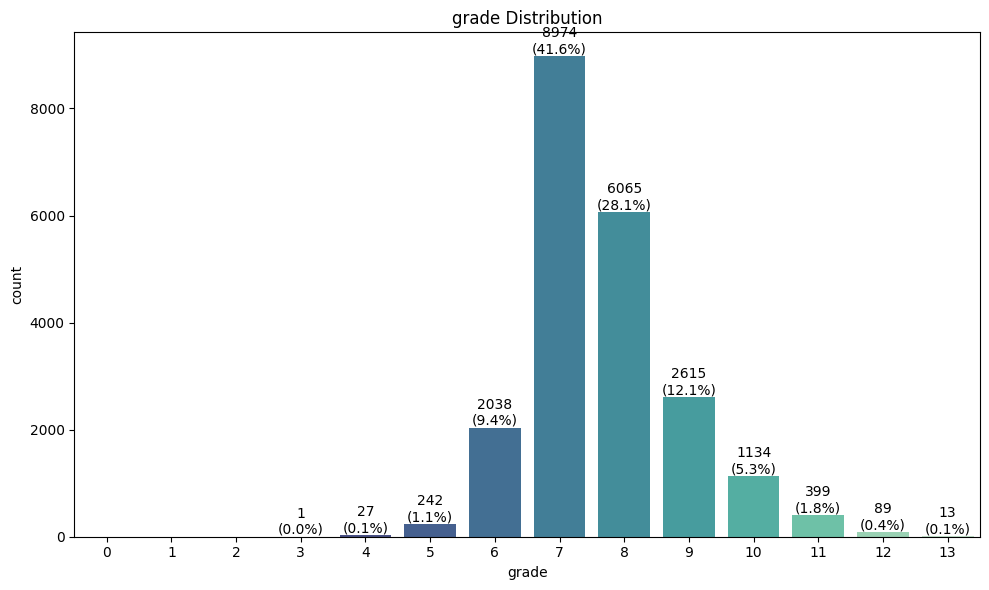

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_dropped, x='grade', 
                   palette='mako', order=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
total = len(combined_dropped)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 50,
            f'{int(p.get_height())}\n({percentage})',
            ha='center', fontsize=10)
plt.title('grade Distribution')
plt.tight_layout()
plt.show()

#### condition - plotting histogram

In [48]:
combined_dropped.condition.describe()


count   21597.000
mean        3.410
std         0.651
min         1.000
25%         3.000
50%         3.000
75%         4.000
max         5.000
Name: condition, dtype: float64

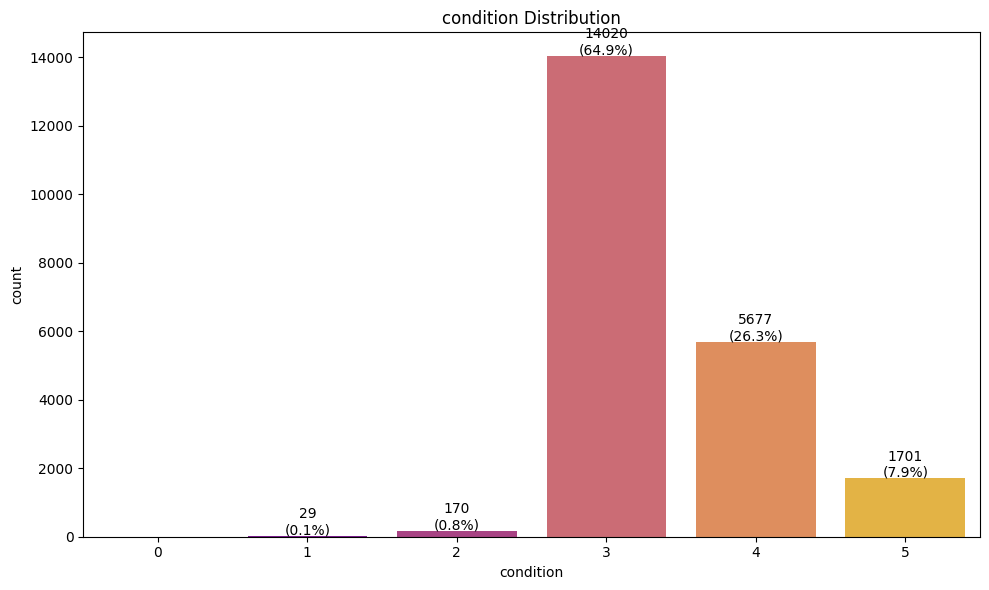

In [49]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_dropped, x='condition', 
                   palette="plasma", order=[0, 1, 2, 3, 4, 5])
total = len(combined_dropped)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 50,
            f'{int(p.get_height())}\n({percentage})',
            ha='center', fontsize=10)
plt.title('condition Distribution')
plt.tight_layout()
plt.show()

#### sqft_living15 - removing outliers and plotting histogram

In [50]:
#sqft_living15

combined_dropped.sqft_living15.describe()

count   21597.000
mean     1986.620
std       685.230
min       399.000
25%      1490.000
50%      1840.000
75%      2360.000
max      6210.000
Name: sqft_living15, dtype: float64

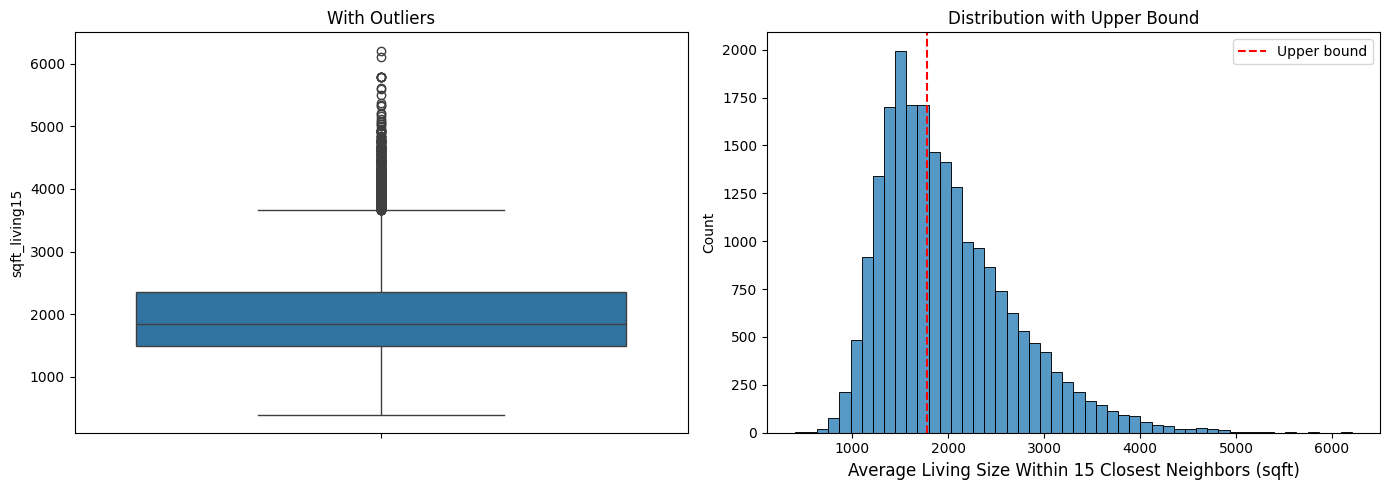

In [51]:
#Visualize outliers before removing:


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot (shows outliers)
sns.boxplot(data=combined_dropped, y='sqft_living15', ax=axes[0])
axes[0].set_title('With Outliers')

# Histogram
sns.histplot(data=combined_dropped, x='sqft_living15', bins=50, ax=axes[1])
axes[1].axvline(upper_bound, color='red', linestyle='--', label='Upper bound')
axes[1].legend()
axes[1].set_title('Distribution with Upper Bound')
plt.xlabel('Average Living Size Within 15 Closest Neighbors (sqft)', fontsize=12)
plt.tight_layout()
plt.show()

In [52]:
Q1 = combined_dropped['sqft_living15'].quantile(0.25)
Q3 = combined_dropped['sqft_living15'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter out outliers
combined_no_outliers = combined_dropped[
    (combined_dropped['sqft_living15'] >= lower_bound) & 
    (combined_dropped['sqft_living15'] <= upper_bound)
]

Q1 (25%): 1490.0
Q3 (75%): 2360.0
IQR: 870.0
Lower bound: 185.0
Upper bound: 3665.0


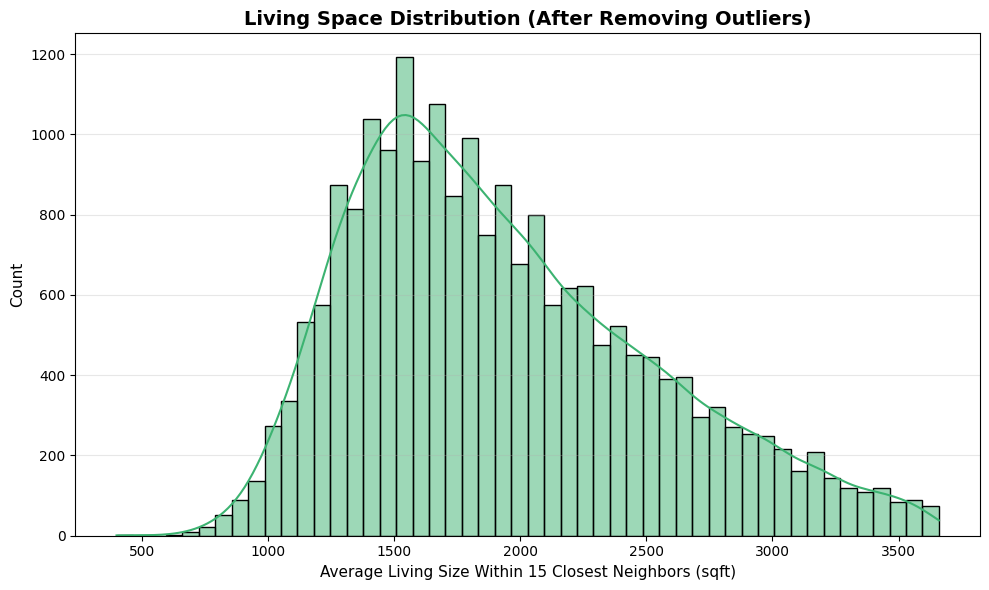

Rows after removing outliers: 21054


In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_no_outliers, x='sqft_living15', 
             bins=50, kde=True, color='mediumseagreen')

plt.title('Living Space Distribution (After Removing Outliers)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Average Living Size Within 15 Closest Neighbors (sqft)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Rows after removing outliers: {len(combined_no_outliers)}")

### filtering suitable houses for the buyer

#### Buyer:
Jennifer Montgomery, buyer, High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year


In [54]:


df_filtered = combined_dropped.query("waterfront == True and grade >= 9 and yr_renovated >= 2005 and sqft_living > sqft_living15")
#df_filtered = combined_dropped.query("waterfront == True and grade >= 9 and yr_renovated >= 2005")
df_filtered[["house_id", "price", "sqft_above", "sqft_basement", "sqft_living", "yr_renovated"]]
#df_filtered.columns


,house_id,price,sqft_above,sqft_basement,sqft_living,yr_renovated
1089,518500460,2230000,2830,930,3760,2014.000
1090,518500480,3000000,3430,980,4410,2014.000
2889,1269200229,1380000,1934,1852,3786,2006.000
4858,1924059029,4670000,4820,4820,9640,2009.000
6904,2623039019,988500,2015,0,2015,2007.000
18250,8043700105,2300000,3940,420,4360,2007.000
20253,9253900271,3570000,3540,1310,4850,2007.000
20670,9362000040,3400000,3740,1490,5230,2005.000


In [55]:
# we removed the houses with too big basements or no basements at all

df_filtered_5 = df_filtered.drop([2889, 4858, 6904])
df_filtered_5[["house_id", "grade", "price", "sqft_above", "sqft_basement", "sqft_living", "yr_renovated"]]

,house_id,grade,price,sqft_above,sqft_basement,sqft_living,yr_renovated
1089,518500460,11,2230000,2830,930,3760,2014.000
1090,518500480,11,3000000,3430,980,4410,2014.000
18250,8043700105,10,2300000,3940,420,4360,2007.000
20253,9253900271,10,3570000,3540,1310,4850,2007.000
20670,9362000040,10,3400000,3740,1490,5230,2005.000


#### Converting yr_renovated to int

In [56]:
combined_dropped = combined_dropped.astype({"yr_renovated": int})

combined_dropped.yr_renovated

0        1991
1        1991
2        1947
3        1952
4        1930
         ... 
21592    1927
21593    1939
21594    1942
21595    2011
21596    1943
Name: yr_renovated, Length: 21597, dtype: int64

### Data correlations

#### Price x grade

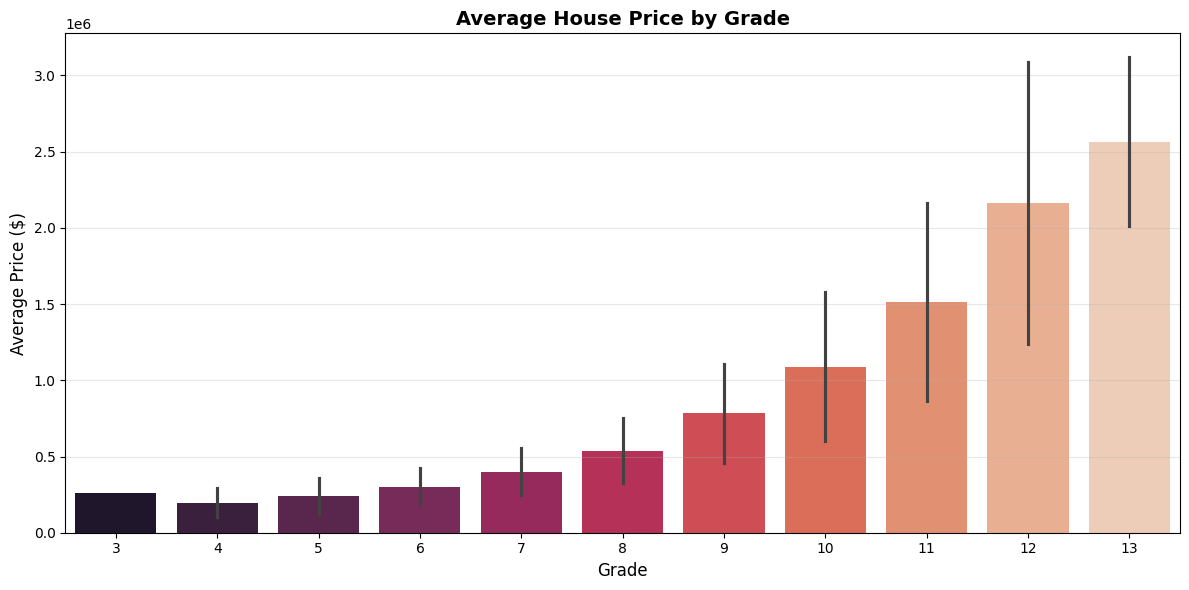

In [57]:
combined_clean

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_clean, x='grade', y='price', 
            palette='rocket', errorbar='sd')  # sd = standard deviation
plt.title('Average House Price by Grade', fontsize=14, fontweight='bold')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

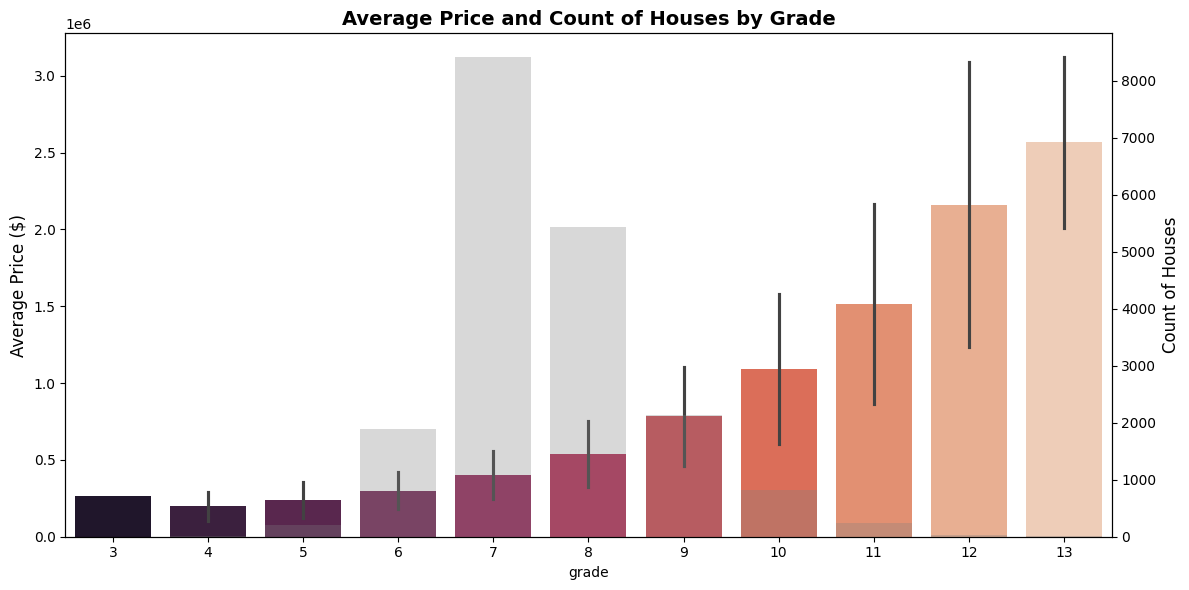

In [58]:
fig, ax1 = plt.subplots(figsize=(12,6))

# --- BARPLOT FOR AVERAGE PRICE ---
sns.barplot(
    data=combined_clean, 
    x='grade', y='price', 
    palette='rocket', errorbar='sd', ax=ax1
)
ax1.set_ylabel("Average Price ($)", fontsize=12)

# --- SECOND AXIS FOR COUNTS ---
ax2 = ax1.twinx()
sns.countplot(
    data=combined_clean,
    x='grade',
    color='gray',
    alpha=0.3,
    ax=ax2
)
ax2.set_ylabel("Count of Houses", fontsize=12)

plt.title("Average Price and Count of Houses by Grade", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### view_quality x grade

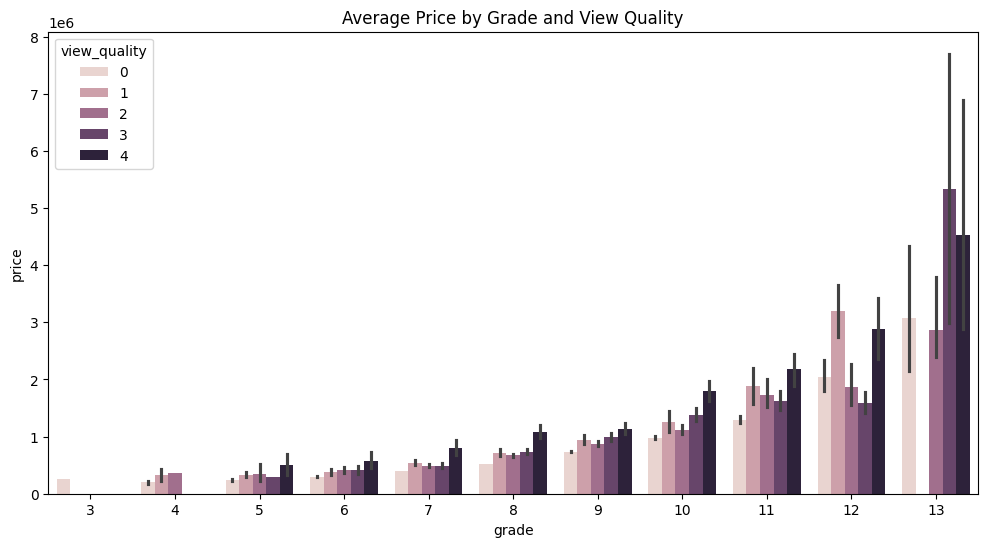

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=combined_dropped,
    x='grade',
    y='price',
    hue='view_quality'
)
plt.title("Average Price by Grade and View Quality")
plt.show()

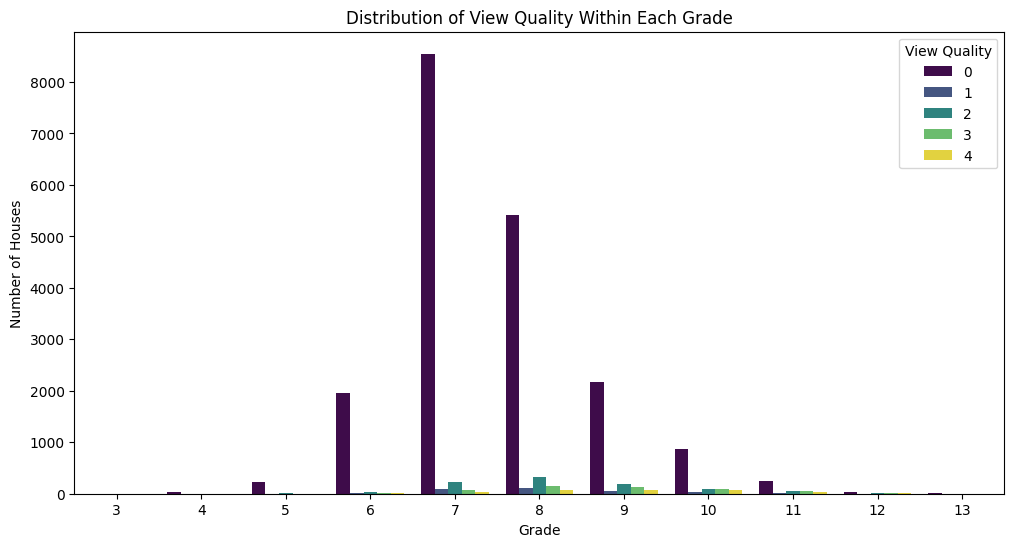

In [60]:
# grouped bar chart

plt.figure(figsize=(12,6))
sns.countplot(
    data=combined_dropped,
    x='grade',
    hue='view_quality',
    palette='viridis'
)

plt.title("Distribution of View Quality Within Each Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Houses")
plt.legend(title="View Quality")
plt.show()

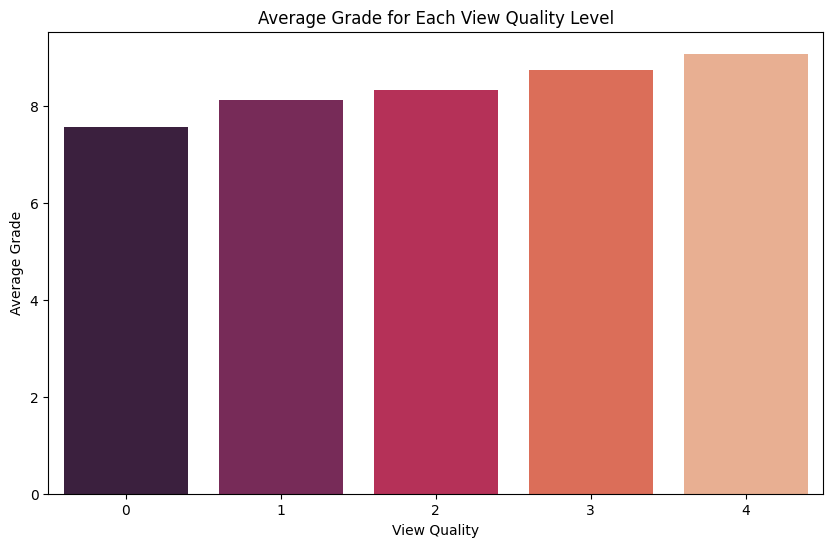

In [61]:
# Bar Chart of Average Grade per View Quality

plt.figure(figsize=(10,6))
sns.barplot(
    data=combined_dropped,
    x='view_quality',
    y='grade',
    palette='rocket',
    errorbar=None
)

plt.title("Average Grade for Each View Quality Level")
plt.xlabel("View Quality")
plt.ylabel("Average Grade")
plt.show()

#### waterfront x grade

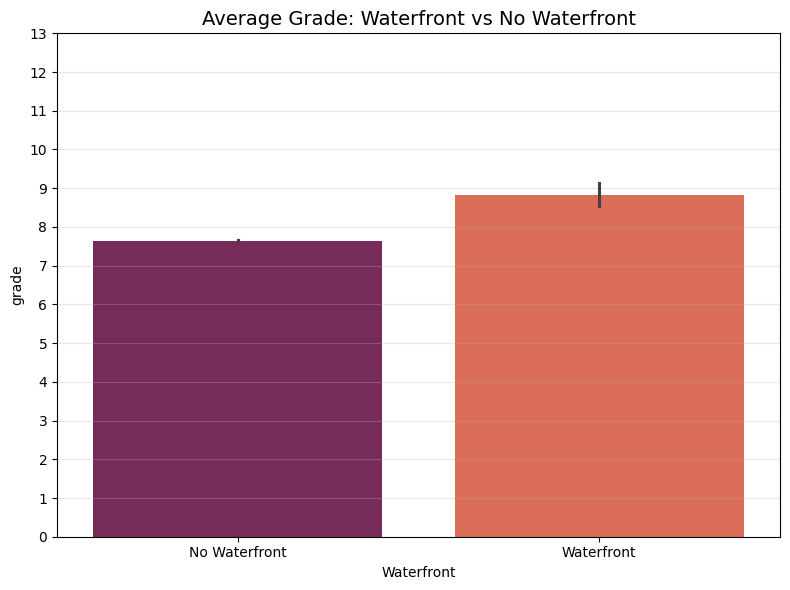

In [64]:
# Barplot — average grade by waterfront

# Create readable labels
combined_dropped['waterfront_label'] = combined_dropped['waterfront'].map({
    True: 'Waterfront',
    False: 'No Waterfront'
})

plt.figure(figsize=(8,6))
sns.barplot(
    data=combined_dropped,
    x='waterfront_label',
    y='grade',
    palette='rocket'
)

plt.title("Average Grade: Waterfront vs No Waterfront", fontsize=14)
plt.xlabel("Waterfront")
#plt.ylabel("Average Grade")

# Fix y-axis ticks
plt.yticks(range(0, 14, 1))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

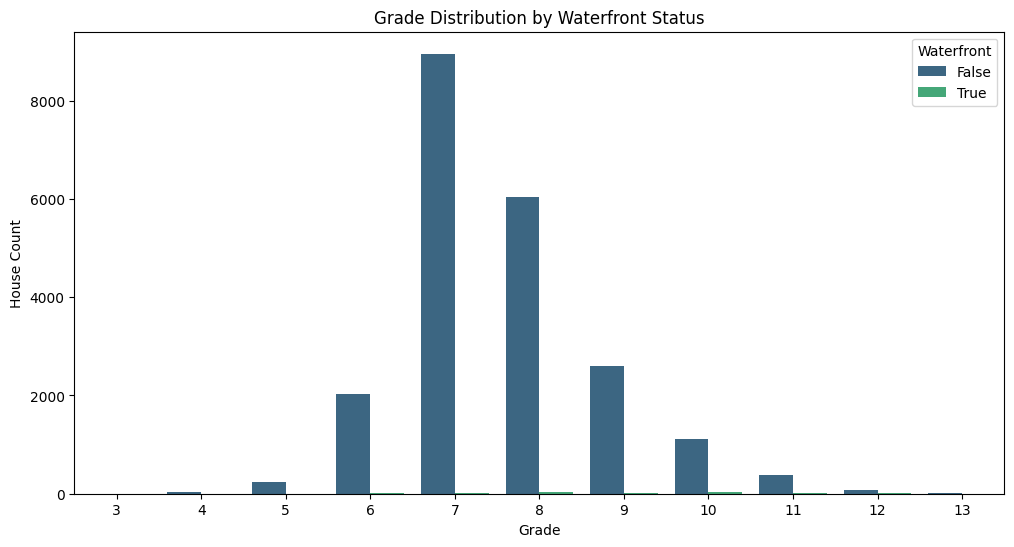

In [65]:
# count plot

plt.figure(figsize=(12,6))
sns.countplot(
    data=combined_dropped,
    x='grade',
    hue='waterfront',
    palette='viridis'
)

plt.title("Grade Distribution by Waterfront Status")
plt.xlabel("Grade")
plt.ylabel("House Count")
plt.legend(title="Waterfront")
plt.show()